In [352]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinicaltrial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
pymaceuticals_df = pd.merge(clinicaltrial_df, mouse_drug_df, on="Mouse ID", how="left")

# Display the data table for preview
pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [24]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupby_tumor_mean = pymaceuticals_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(groupby_tumor_mean).reset_index()

# Preview DataFrame
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [395]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
groupby_tumor_sem = pymaceuticals_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
sem_tumor_df = pd.DataFrame(groupby_tumor_sem).reset_index()

# Preview DataFrame
sem_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [26]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_pv = mean_tumor_df.pivot_table(values="Tumor Volume (mm3)",
                                   index="Timepoint", columns="Drug")
# Preview that Reformatting worked
mean_tumor_pv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [28]:
# Re-Format the Standard Error Data Frames
sem_tumor_pv = sem_tumor_df.pivot_table(values="Tumor Volume (mm3)",
                                   index="Timepoint", columns="Drug")

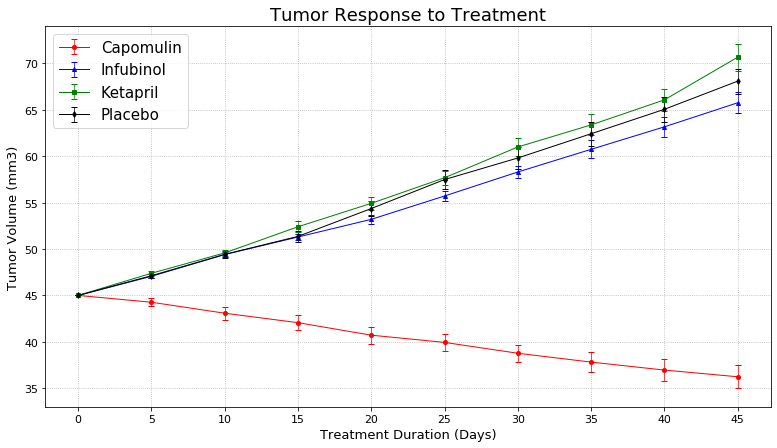

In [399]:
# Generate the Plot (with Error Bars)
days = np.arange(mean_tumor_pv.index[0],mean_tumor_pv.index[-1] +5,5)

plt.figure(figsize = (13,7))
   
plt.xticks(np.arange(0, mean_tumor_pv.index.max()+1, 5), fontsize='11')
plt.yticks(fontsize='11')
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
colors = ["red", "blue", "green", "black"]
markers = ["o", "^", "s", "d"]

count_drug = 0
for drug in drugs:
    plt.errorbar(days, mean_tumor_pv[drug], sem_tumor_pv[drug], 
                 color=colors[count_drug], marker=markers[count_drug],
                 linewidth = 1, markersize=4, capsize=3, elinewidth=0.7)
    count_drug +=1
    
# Create labels for the X and Y axis
plt.title("Tumor Response to Treatment", fontsize='18')
plt.xlabel("Treatment Duration (Days)", fontsize='13')
plt.ylabel("Tumor Volume (mm3)", fontsize='13')
plt.legend(labels=drugs, loc="best", fontsize='15')
# Set the limits for the X and Y axes
plt.ylim(33,74)

# Set a grid on the plot
plt.grid(linestyle='dotted')

# Save and display the chart
plt.savefig("Charts/tumor_response_to_treatment.png")
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
groupby_metastatic_mean = pymaceuticals_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_metastatic_df = pd.DataFrame(groupby_metastatic_mean).reset_index()

# Preview DataFrame
mean_metastatic_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
groupby_metastatic_sem = pymaceuticals_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
sem_metastatic_df = pd.DataFrame(groupby_metastatic_sem).reset_index()

# Preview DataFrame
sem_metastatic_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_pv = mean_metastatic_df.pivot_table(values="Metastatic Sites", index="Timepoint", columns="Drug")
# Preview that Reformatting worked
mean_metastatic_pv.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
# Minor Data Munging to Re-Format the Data Frames
sem_metastatic_pv = sem_metastatic_df.pivot_table(values="Metastatic Sites", index="Timepoint", columns="Drug")

# Preview that Reformatting worked
sem_metastatic_pv.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


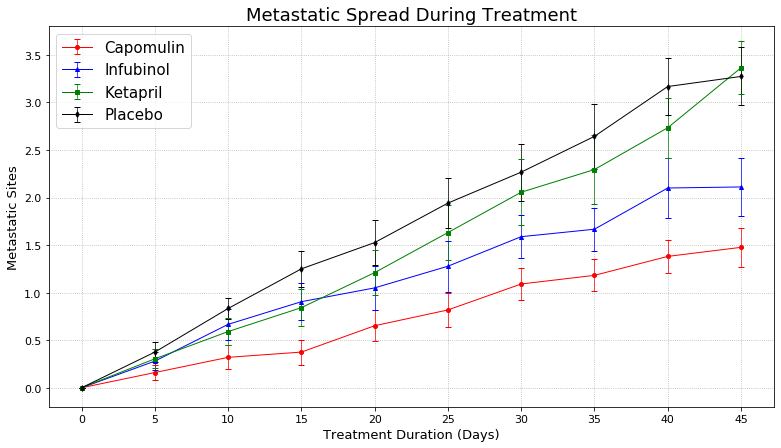

In [398]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (13,7))
  
plt.xticks(np.arange(0, mean_tumor_pv.index.max()+1, 5), fontsize='11')
plt.yticks(fontsize='11')
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
colors = ["red", "blue", "green", "black"]
markers = ["o", "^", "s", "d"]

count_drug = 0
for drug in drugs:
    plt.errorbar(days, mean_metastatic_pv[drug], sem_metastatic_pv[drug], 
                 color=colors[count_drug], marker=markers[count_drug],
                 linewidth = 1, markersize=4, capsize=3, elinewidth=0.7)
    count_drug +=1

# Create labels for the X and Y axis
plt.title("Metastatic Spread During Treatment", fontsize='18')
plt.xlabel("Treatment Duration (Days)", fontsize='13')
plt.ylabel("Metastatic Sites", fontsize='13')
plt.legend(labels=drugs, loc="best", fontsize='15')  

# Set the limits for the X and Y axes
plt.ylim(-0.2,3.8)

# Set a grid on the plot
plt.grid(linestyle='dotted')
# Save the Figure
plt.savefig("Charts/metastatic_spread_during_treatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
groupby_mice_count = pymaceuticals_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
count_mice_df = pd.DataFrame({"Mouse Count":groupby_mice_count}).reset_index()

# Preview DataFrame
count_mice_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frame
count_mice_pv = count_mice_df.pivot_table(values="Mouse Count", index="Timepoint", columns="Drug")
# Preview
count_mice_pv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [99]:
count_mice_pv[drug][0]

26

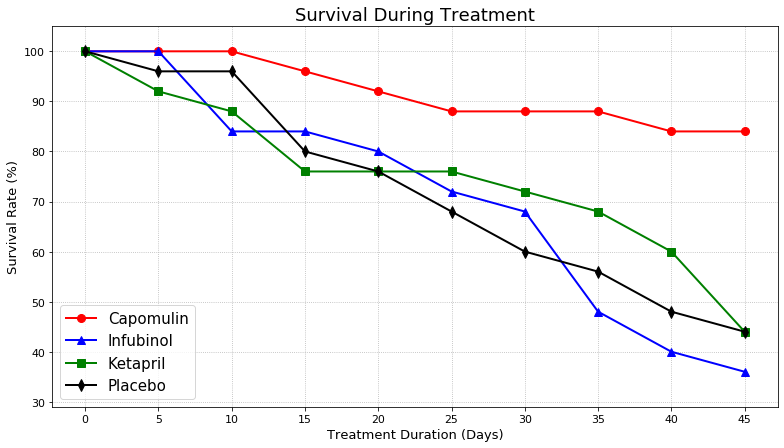

In [400]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (13,7))
  
plt.xticks(np.arange(count_mice_df.index[0], count_mice_df.index.max()+1, 5), fontsize='11')
plt.yticks(fontsize='11')
count_drug = 0
for drug in drugs:
    count_mice = count_mice_pv[drug]/count_mice_pv[drug][0]*100
    plt.plot(days, count_mice, color=colors[count_drug], marker=markers[count_drug],
                 linewidth = 2, markersize=8)
    count_drug +=1
    
# Create labels for the X and Y axis
plt.title("Survival During Treatment", fontsize='18')
plt.xlabel("Treatment Duration (Days)", fontsize='13')
plt.ylabel("Survival Rate (%)", fontsize='13')
plt.legend(labels=drugs, loc="best", fontsize='15')  

# Set the limits for the X and Y axes
plt.ylim(29,105)

# Set a grid on the plot
plt.grid(linestyle='dotted')
# Save the Figure
plt.savefig("Charts/survival_during_treatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [131]:
# Calculate the percent changes for each drug
percent_changes = ((mean_tumor_pv.iloc[-1]/mean_tumor_pv.iloc[0])-1)*100
# Display the data to confirm
percent_changes


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [231]:
passing = []
failing = []
for drug in drugs:
    if drug in percent_changes.index:
        if percent_changes[drug] < 0:
            passing.append(percent_changes[drug])
        else:
            failing.append(percent_changes[drug])
print(passing)
print(failing)

[-19.47530266789417]
[46.12347172785185, 57.02879468660606, 51.29796048315151]


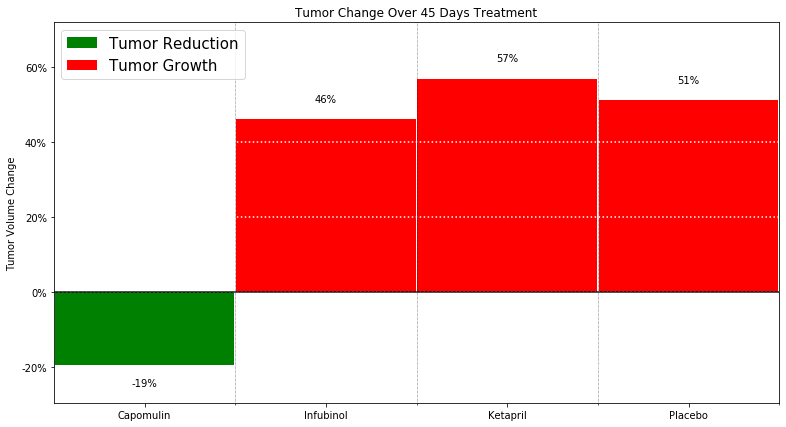

In [455]:
# Store all Relevant Percent Changes into a Tuple
tuples_relevant = list(zip(failing, passing))

# Splice the data between passing and failing drugs
passing_axis = np.arange(0, len(passing))
failing_axis = np.arange(len(passing), len(failing) + len(passing))
#tick_locations = (passing_axis, failing_axis)
fig, ax = plt.subplots(figsize = (13,7))
#ax.figure(figsize = (13,7))
passing_bar = ax.bar(passing_axis, passing, facecolor="green", width=0.99, align="center")
failing_bar = ax.bar(failing_axis, failing, facecolor="red", width=0.99, align="center")

locs = np.arange(len(drugs))

ax.set_xticks(locs + 0.5, minor=True)
ax.set_xticks(locs)
ax.set_xticklabels(drugs)
#Turn on the grid for the minor ticks
ax.grid(True, which='minor', color='black', linestyle='dotted', linewidth=0.5)

ax.yaxis.grid(which="major", color='white', linestyle='dotted', linewidth=1.5)

ax.legend((passing_bar[0], failing_bar[0]), ('Tumor Reduction', 'Tumor Growth'), loc=2, fontsize='15')

ax.set_ylim(min(passing)-10,max(failing)+15)
ax.set_xlim(-0.5, 3.5)
    
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.yaxis.set_major_formatter(formatter)
#Add a horizontal line at y = 0
#
plt.axhline(y=0, color = 'black', alpha=0.9)
# Orient widths. Add labels, tick marks, etc. 
ax.set_title("Tumor Change Over 45 Days Treatment")
#plt.xlabel("Treatments")
ax.set_ylabel("Tumor Volume Change")


# Use functions to label the percentages of changes
def autolabel(bars, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for bar in bars:
        height = bar.get_height()
            
        if height < 0:
            # Vertically align label at top
            label_position = height - (y_height * 0.06)
        else : 
            label_position = height + (y_height * 0.04)

        ax.text(bar.get_x() + bar.get_width()/2., label_position,
                '%d' % int(height) + "%",
                ha='center', va='bottom')
        

# Call functions to implement the function calls
autolabel(passing_bar, ax)
autolabel(failing_bar, ax)

# Save the Figure
plt.savefig("Charts/tumor_change.png")

# Show the Figure
plt.show()

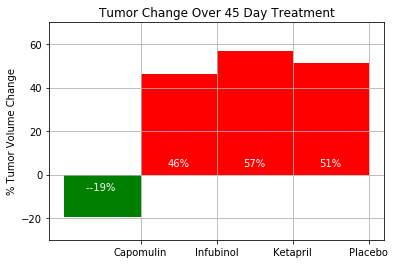